In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

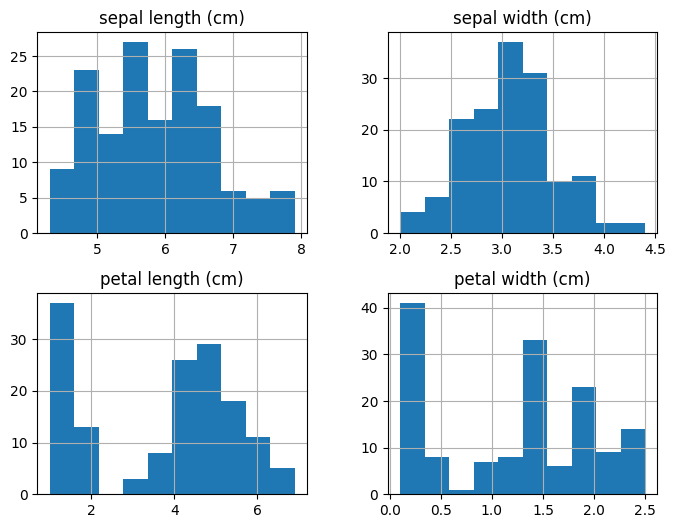

In [ ]:
df.hist(figsize=(8,6))

<Axes: >

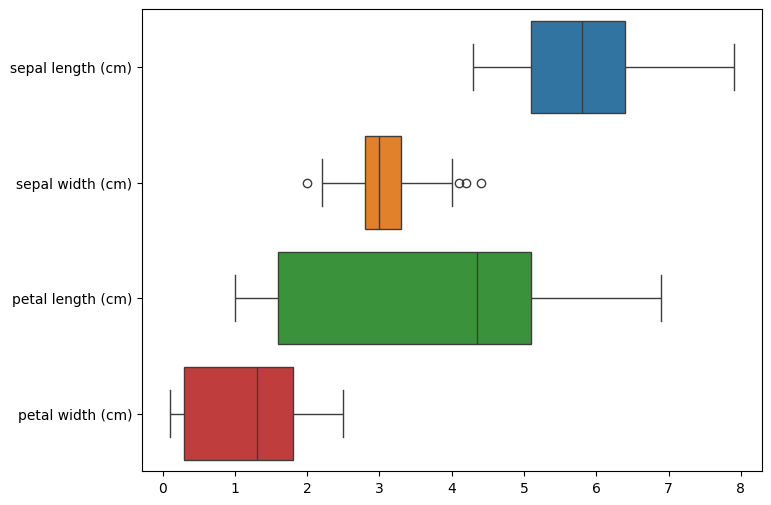

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df, orient='h')

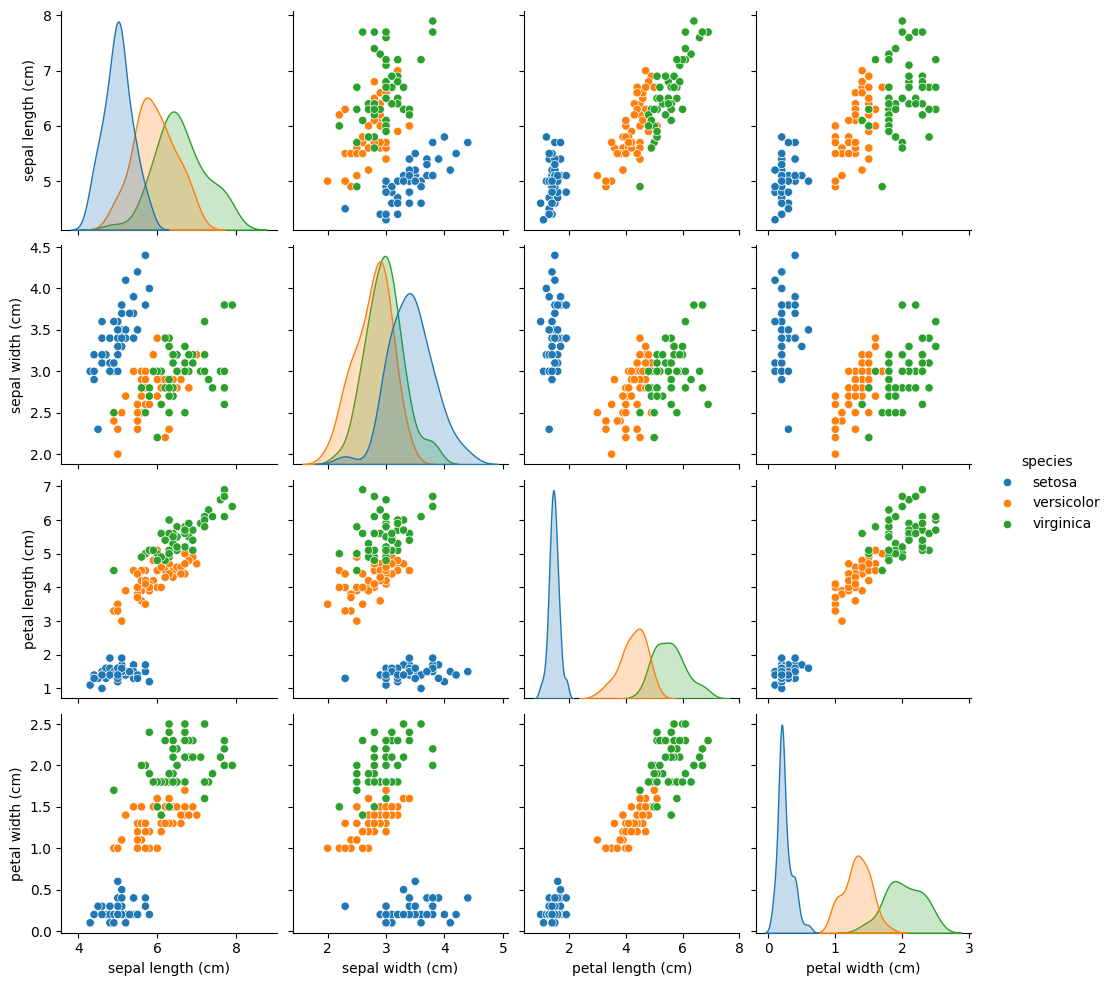

In [ ]:
sns.pairplot(df, hue='species')

<Axes: >

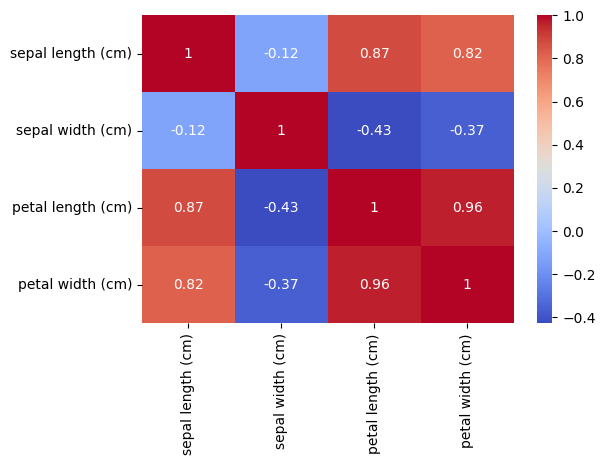

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap='coolwarm')

In [ ]:
df.groupby("species").mean()

/tmp/ipython-input-2880954085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("species").mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Text(0.5, 1.0, 'PCA of Iris Dataset')

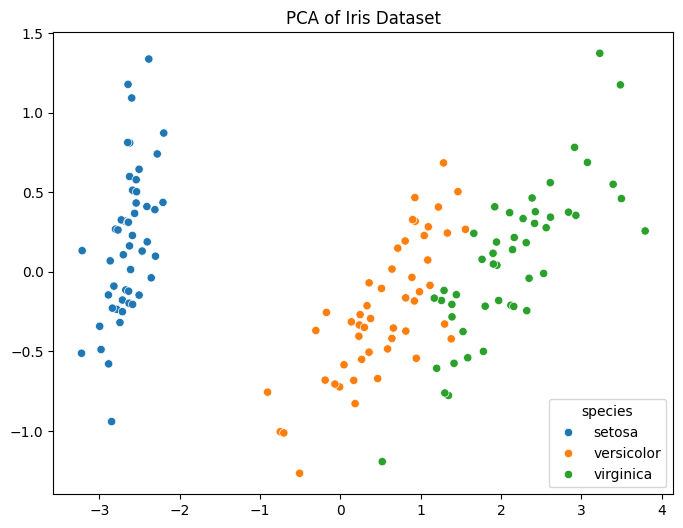

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['species'])
plt.title("PCA of Iris Dataset")

In [ ]:
X = df.drop(columns=['species'])
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-validation scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean cross-validation accuracy: 0.97
